## 패키지 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## plot 환경설정

In [2]:
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = matplotlib.font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['figure.figsize'] = [15, 10]
matplotlib.rcParams['axes.grid'] = True

# 2019, 2020 관객 수 및 매출액 비교

## csv에서 데이터 로드

In [3]:
def convert_numeric(df) :
    for col in df.columns :
        df[col] = df[col].str.replace(pat=',', repl='', regex=False)
        df[col] = pd.to_numeric(df[col])
        
    return df

In [16]:
movie2019 = pd.read_csv("2019_관객수_및_매출액_월별.csv")
movie2019 = movie2019[0:10]
movie2019 = convert_numeric(movie2019[['년월', '한국영화관객수', '외국영화관객수', '전체영화관객수', '전체영화매출액']].set_index('년월'))
movie2019

,한국영화관객수,외국영화관객수,전체영화관객수,전체영화매출액
년월,,,,
2019-01,11950823,6171620,18122443,151161478196
2019-02,17228752,5048981,22277733,189990807970
2019-03,6267605,8404088,14671693,126559017449
2019-04,2871972,10466990,13338962,113184664392
2019-05,8614235,9448222,18062457,154563004957
2019-06,9943592,12901987,22845579,195237798708
2019-07,3340740,18575725,21916465,184101302717
2019-08,17981401,6804720,24786121,208958173044
2019-09,11964689,2768953,14733642,124445262708


In [17]:
movie2020 = pd.read_csv("2020_관객수_및_매출액_월별.csv")
movie2020 = movie2020[0:10]
movie2020 = convert_numeric(movie2020[['년월', '한국영화관객수', '외국영화관객수', '전체영화관객수', '전체영화매출액']].set_index('년월'))
movie2020

,한국영화관객수,외국영화관객수,전체영화관객수,전체영화매출액
년월,,,,
2020-01,11588401,5255294,16843695,143681061430
2020-02,4942629,2429741,7372370,62303647980
2020-03,307866,1526856,1834722,15152718950
2020-04,146076,826496,972572,7515666040
2020-05,220161,1306075,1526236,12393715040
2020-06,2786453,1078080,3864533,32760133800
2020-07,4691821,926856,5618677,47239684650
2020-08,7377415,1457187,8834602,77213128039
2020-09,1359287,1629395,2988682,26032018372


In [47]:
movie_year = pd.read_csv("연도별_관객수_및_매출액.csv")
movie_year = movie_year[7:17]
movie_year

,년월,한국영화개봉편수,한국영화상영편수,한국영화매출액,한국영화관객수,한국영화점유율,외국영화개봉편수,외국영화상영편수,외국영화매출액,외국영화관객수,외국영화점유율,전체영화개봉편수,전체영화상영편수,전체영화매출액,전체영화관객수
7,2011,152,334,"613,722,968,100","82,868,189",51.9%,290,609,"622,076,496,100","76,856,276",48.1%,442,943,"1,235,799,464,200","159,724,465"
8,2012,176,389,"838,238,171,234","114,911,591",59.0%,465,842,"616,902,183,201","79,978,996",41.0%,641,"1,231","1,455,140,354,435","194,890,587"
9,2013,183,491,"909,932,880,105","127,291,781",59.7%,724,"1,184","641,419,104,616","86,059,249",40.3%,907,"1,675","1,551,351,984,721","213,351,030"
10,2014,217,515,"820,639,569,302","107,703,922",50.1%,878,"1,437","843,592,979,858","107,365,036",49.9%,"1,095","1,952","1,664,232,549,160","215,068,958"
11,2015,257,584,"879,658,901,660","112,941,882",52.0%,946,"1,556","835,842,670,018","104,357,641",48.0%,"1,203","2,140","1,715,501,571,678","217,299,523"
12,2016,337,701,"927,865,027,723","116,555,889",53.7%,"1,237","1,911","815,329,396,647","100,470,293",46.3%,"1,574","2,612","1,743,194,424,370","217,026,182"
13,2017,495,886,"902,667,356,338","113,907,067",51.8%,"1,272","2,059","853,910,494,775","105,969,160",48.2%,"1,767","2,945","1,756,577,851,113","219,876,227"
14,2018,661,"1,089","912,746,432,308","110,149,287",50.9%,"1,210","2,084","901,217,376,930","106,235,982",49.1%,"1,871","3,173","1,813,963,809,238","216,385,269"
15,2019,697,"1,110","970,793,408,451","115,621,862",51.0%,"1,246","1,956","943,195,671,617","111,056,915",49.0%,"1,943","3,066","1,913,989,080,068","226,678,777"
16,2020,676,959,"340,141,946,680","39,262,407",68.7%,982,"1,674","149,918,287,201","17,911,823",31.3%,"1,658","2,633","490,060,233,881","57,174,230"


## 최근 10년 간 영화 매출액 및 관객 수

In [48]:
movie_recent10y = movie_year[['년월', '한국영화매출액', '한국영화관객수', '전체영화매출액', '전체영화관객수']].set_index('년월')
movie_recent10y = convert_numeric(movie_recent10y)
movie_recent10y[['한국영화매출액', '전체영화매출액']] = movie_recent10y[['한국영화매출액', '전체영화매출액']] / 100000000
movie_recent10y[['한국영화관객수', '전체영화관객수']] = movie_recent10y[['한국영화관객수', '전체영화관객수']] / 1000000
movie_recent10y

,한국영화매출액,한국영화관객수,전체영화매출액,전체영화관객수
년월,,,,
2011,6137.229681,82.868189,12357.994642,159.724465
2012,8382.381712,114.911591,14551.403544,194.890587
2013,9099.328801,127.291781,15513.519847,213.351030
2014,8206.395693,107.703922,16642.325492,215.068958
2015,8796.589017,112.941882,17155.015717,217.299523
2016,9278.650277,116.555889,17431.944244,217.026182
2017,9026.673563,113.907067,17565.778511,219.876227
2018,9127.464323,110.149287,18139.638092,216.385269
2019,9707.934085,115.621862,19139.890801,226.678777


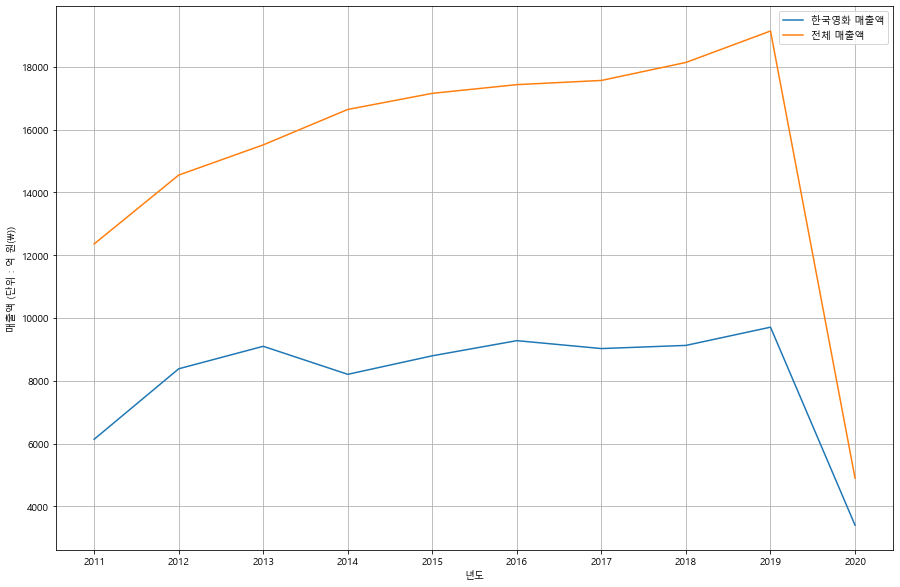

In [49]:
plt.plot(movie_recent10y['한국영화매출액'], label = '한국영화 매출액')
plt.plot(movie_recent10y['전체영화매출액'], label = '전체 매출액')
plt.ylabel('매출액 (단위 : 억 원(\))')
plt.xlabel('년도')
plt.legend()
plt.show()

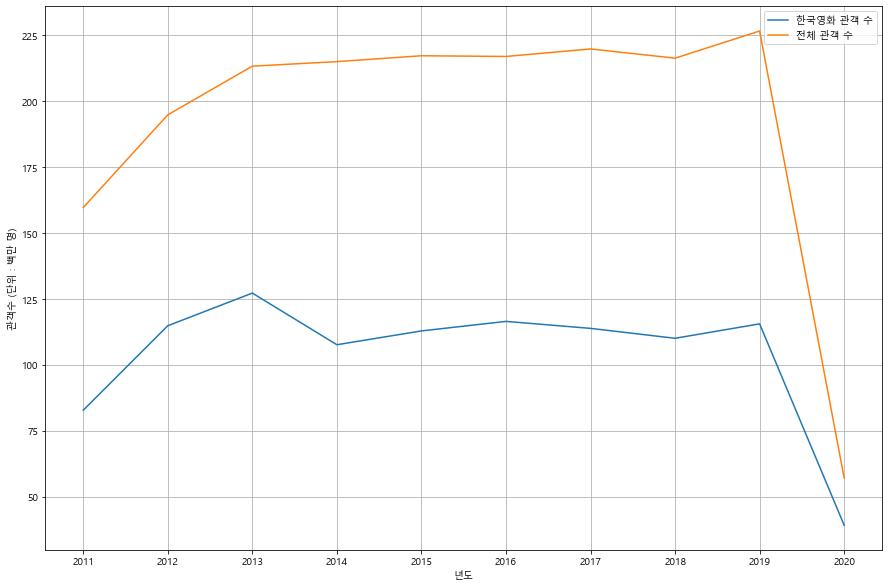

In [50]:
plt.plot(movie_recent10y['한국영화관객수'], label = '한국영화 관객 수')
plt.plot(movie_recent10y['전체영화관객수'], label = '전체 관객 수')
plt.ylabel('관객수 (단위 : 백만 명)')
plt.xlabel('년도')
plt.legend()
plt.show()

## 2019, 2020 동일 기간(1월 ~ 10월) 비교
---
- 2020년 11월은 집계 부족, 12월은 미집계로 11월, 12월을 비교 기간에서 제외
- 코로나 팬데믹 선언 시점을 2020년 3월로 지정

In [21]:
movie2019[['전체영화관객수', '한국영화관객수', '외국영화관객수']] = movie2019[['전체영화관객수', '한국영화관객수', '외국영화관객수']] / 10000
movie2019['전체영화매출액'] = movie2019['전체영화매출액'] / 100000000
movie2020[['전체영화관객수', '한국영화관객수', '외국영화관객수']] = movie2020[['전체영화관객수', '한국영화관객수', '외국영화관객수']] / 10000
movie2020['전체영화매출액'] = movie2020['전체영화매출액'] / 100000000

In [22]:
movie2019mon = movie2019.reset_index(drop=True)
movie2020mon = movie2020.reset_index(drop=True)

movie2019mon.index = movie2019mon.index + 1
movie2020mon.index = movie2020mon.index + 1

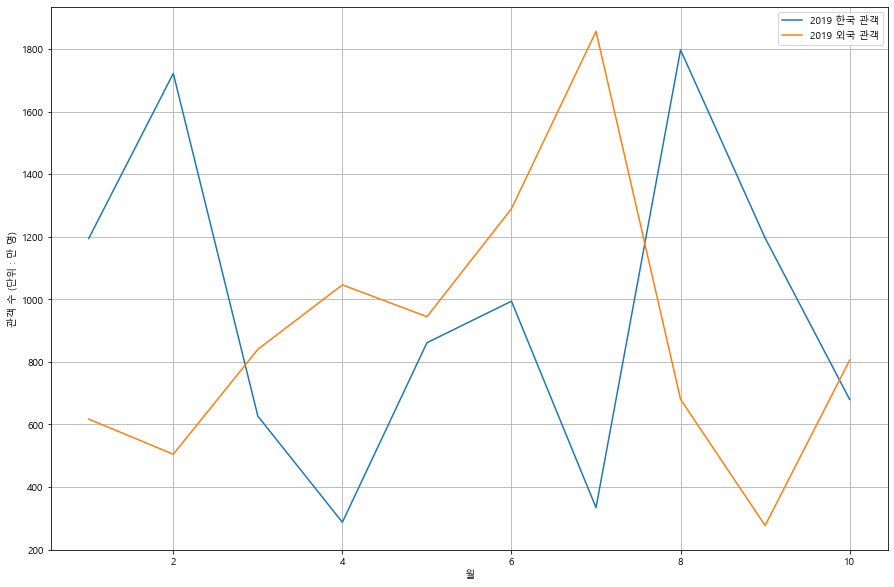

In [32]:
plt.plot(movie2019mon['한국영화관객수'], label='2019 한국 관객')
plt.plot(movie2019mon['외국영화관객수'], label='2019 외국 관객')
plt.xlabel('월')
plt.ylabel('관객 수 (단위 : 만 명)')
plt.legend()
plt.show()

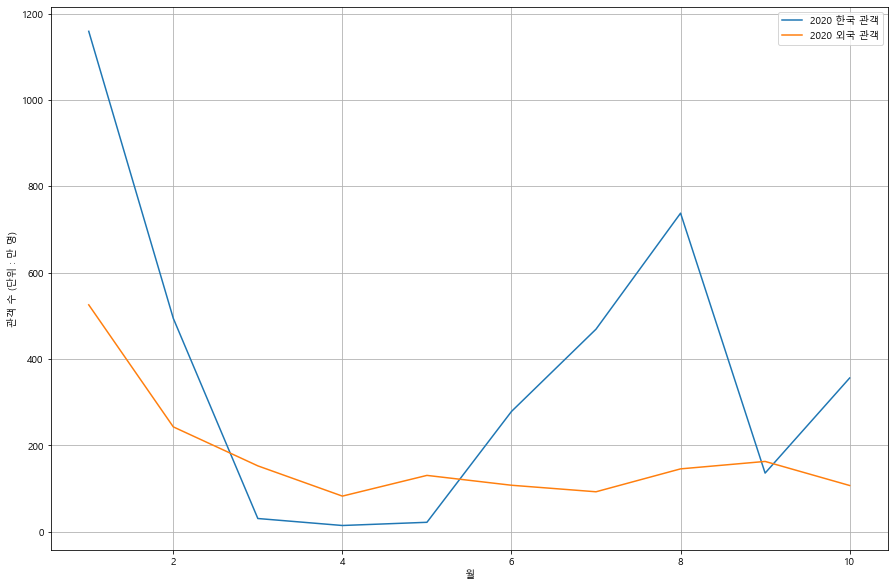

In [33]:
plt.plot(movie2020mon['한국영화관객수'], label='2020 한국 관객')
plt.plot(movie2020mon['외국영화관객수'], label='2020 외국 관객')
plt.xlabel('월')
plt.ylabel('관객 수 (단위 : 만 명)')
plt.legend()
plt.show()

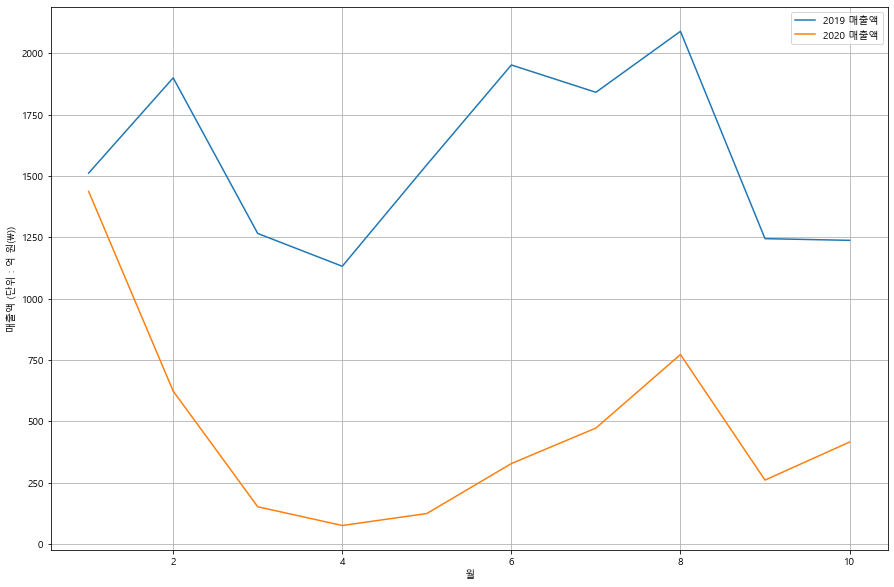

In [31]:
plt.plot(movie2019mon['전체영화매출액'], label='2019 매출액')
plt.plot(movie2020mon['전체영화매출액'], label='2020 매출액')
plt.xlabel('월')
plt.ylabel('매출액 (단위 : 억 원(\))')
plt.legend()
plt.show()

# 영화 관련 주가 2019, 2020 비교

## csv에서 데이터 로드

In [34]:
def load_stock_csv(csv_path) :
    df = pd.read_csv(csv_path)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df.drop(['Open', 'High', 'Low', 'Adj Close'], axis=1, inplace=True)
    
    return df

In [35]:
cgv_path = 'CJCGV_190101_201031.csv'
megabox_path = 'MEGABOX_190101_201031.csv'
ihq_path = 'IHQ_190101_201031.csv'

In [36]:
cgv = load_stock_csv(cgv_path)
cgv

,Date,Close,Volume
0,2019-01-02,40300.0,108612.0
1,2019-01-03,40400.0,86441.0
2,2019-01-04,39850.0,128704.0
3,2019-01-07,40600.0,91427.0
4,2019-01-08,40400.0,86558.0
...,...,...,...
447,2020-10-26,20350.0,190675.0
448,2020-10-27,20100.0,211581.0
449,2020-10-28,20600.0,140623.0
450,2020-10-29,20450.0,149115.0


In [37]:
megabox = load_stock_csv(megabox_path)
megabox

,Date,Close,Volume
0,2019-01-02,45600.0,226973.0
1,2019-01-03,46450.0,220751.0
2,2019-01-04,47400.0,119393.0
3,2019-01-07,51500.0,506776.0
4,2019-01-08,51300.0,216930.0
...,...,...,...
447,2020-10-26,24900.0,129528.0
448,2020-10-27,25700.0,85372.0
449,2020-10-28,25600.0,61261.0
450,2020-10-29,25100.0,64359.0


In [38]:
ihq = load_stock_csv(ihq_path)
ihq

,Date,Close,Volume
0,2019-01-02,1870.0,446070.0
1,2019-01-03,1860.0,465663.0
2,2019-01-04,1870.0,507436.0
3,2019-01-07,1915.0,669313.0
4,2019-01-08,1865.0,331427.0
...,...,...,...
447,2020-10-26,1335.0,308932.0
448,2020-10-27,1315.0,266629.0
449,2020-10-28,1350.0,206768.0
450,2020-10-29,1375.0,1481566.0


## 그래프 그리기용 DataFrame

In [39]:
stockDF = pd.DataFrame()
stockDF['Date'] = cgv['Date']
stockDF['CGV'] = cgv['Close']
stockDF['MEGABOX'] = megabox['Close']
stockDF['IHQ'] = ihq['Close']
stockDF = stockDF.set_index('Date')
stockDF

,CGV,MEGABOX,IHQ
Date,,,
2019-01-02,40300.0,45600.0,1870.0
2019-01-03,40400.0,46450.0,1860.0
2019-01-04,39850.0,47400.0,1870.0
2019-01-07,40600.0,51500.0,1915.0
2019-01-08,40400.0,51300.0,1865.0
...,...,...,...
2020-10-26,20350.0,24900.0,1335.0
2020-10-27,20100.0,25700.0,1315.0
2020-10-28,20600.0,25600.0,1350.0


## 주가 그래프
---
- 코로나 팬데믹 선언 시점을 2020년 3월로 지정
---
- CJ CGV : CGV 멀티플렉스 영화관 운영


- (주)제이콘텐트리 : MEGABOX 영화관 운영, 'SKY캐슬' 등 드라마 제작, 컨텐츠 유통 사업


- IHQ : 사이더스HQ, '감기' 등 영화 제작, 배급 사업
 + 다른 기업 대비 주가가 매우 낮아 그래프상 변화를 보기 힘들어 10을 곱하여 표시

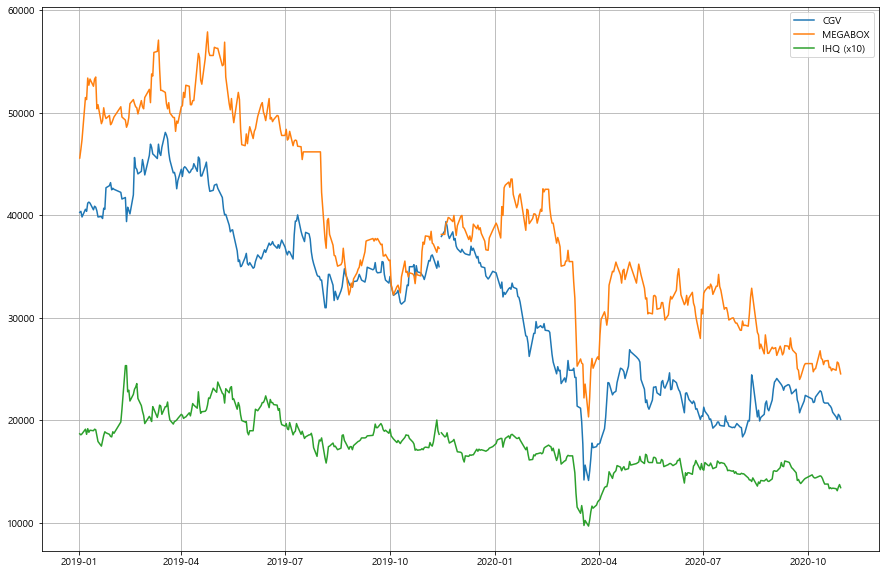

In [40]:
plt.plot(stockDF['CGV'], label='CJ CGV')
plt.plot(stockDF['MEGABOX'], label='(주)제이콘텐트리')
plt.plot(stockDF['IHQ'] * 10, label='IHQ (x10)')
plt.legend()
plt.show()

## CJ CGV 기준 동일 기간 주식 거래량 비교

In [41]:
cgv2019 = cgv.query('Date > "2019-01-01" and Date < "2019-12-31"')
cgv2019 = cgv2019.drop('Date', axis=1)

cgv2020 = cgv.query('Date > "2020-01-01" and Date < "2020-12-31"')
cgv2020 = cgv2020.drop('Date', axis=1)
cgv2020 = cgv2020.reset_index(drop=True)

In [44]:
cgv_stock_graph = pd.DataFrame()
cgv_stock_graph['2019'] = cgv2019['Volume'] / 1000
cgv_stock_graph['2020'] = cgv2020['Volume'] / 1000
cgv_stock_graph

,2019,2020
0,108.612,59.161
1,86.441,135.917
2,128.704,88.852
3,91.427,68.692
4,86.558,157.565
...,...,...
241,62.750,NaN
242,114.477,NaN
243,71.866,NaN
244,73.982,NaN


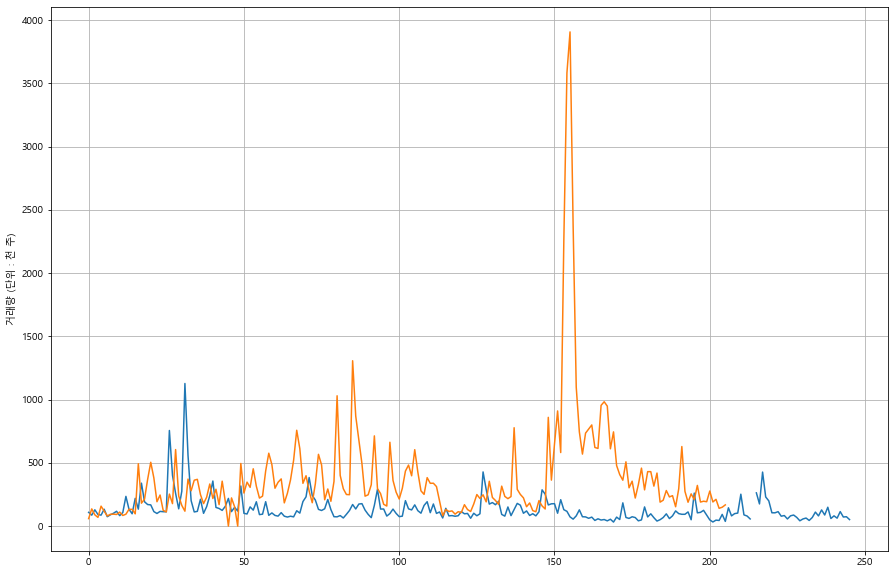

In [46]:
plt.plot(cgv_stock_graph)
plt.ylabel('거래량 (단위 : 천 주)')
plt.show()